**Importação do DF que serve de base no PNCP e respectivos valores a cada ano**

In [19]:
import pandas as pd
import requests
import os  
import numpy as np

df_calc_totais=pd.read_csv('./dadosPNCP_completo_tratado.csv')

#transforma a coluna de cod de municípios para string e assimpoder fazer join com tabela de população
df_calc_totais['unidadeOrgao_codigoIbge']=df_calc_totais['unidadeOrgao_codigoIbge'].astype(str)
#df_calc_totais.info()

C:\Users\Administrador\AppData\Local\Temp\ipykernel_3876\2728812788.py:6: DtypeWarning: Columns (14,17,18,21,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df_calc_totais=pd.read_csv('./dadosPNCP_completo_tratado.csv')


**Tratamento da tabela de Prévia do Censo 2022**



In [48]:
#transformação em df da planilha de população do IBGE
df_popul=pd.read_csv('.\POP_DOU_2023_Municipios_POP2022_Malha2023.csv', delimiter= ';')


In [49]:
#adaptação da coluna cod. mun para numerico inteiro e posterior inserção de dígitos compatíveis com o formato da coluna de códigos IBGE do arquivo do PNCP 
df_popul['COD_MUNIC_NUM']=pd.to_numeric(df_popul['COD. MUNIC'], errors='coerce')

#df_popul.info()

def padronizar_digito_inteiro(valor, digitos=5):
    return f"{valor:0{digitos}d}"

df_popul['COD_MUNIC_NUM'] = df_popul['COD_MUNIC_NUM'].apply(lambda x: padronizar_digito_inteiro(x, digitos=5))

df_popul['cod_mun_corr']=df_popul['COD. UF'].astype(str)+df_popul['COD_MUNIC_NUM'].astype(str)

df_popul.rename(columns={" POPULAÇÃO ":"populacao"},inplace=True) #limpeza feita antes do join

df_popul['populacao']=df_popul['populacao'].str.replace('.','') #limpeza feita antes do join

df_popul['populacao']=df_popul['populacao'].astype('int64')
df_popul['ente_obrigado']=(df_popul['populacao']>20000)
df_popul

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,populacao,COD_MUNIC_NUM,cod_mun_corr,ente_obrigado
0,RO,11,15,Alta Floresta D'Oeste,21494,00015,1100015,True
1,RO,11,23,Ariquemes,96833,00023,1100023,True
2,RO,11,31,Cabixi,5351,00031,1100031,False
3,RO,11,49,Cacoal,86887,00049,1100049,True
4,RO,11,56,Cerejeiras,15890,00056,1100056,False
...,...,...,...,...,...,...,...,...
5565,GO,52,22005,Vianópolis,14956,22005,5222005,False
5566,GO,52,22054,Vicentinópolis,8768,22054,5222054,False
5567,GO,52,22203,Vila Boa,4215,22203,5222203,False
5568,GO,52,22302,Vila Propício,5815,22302,5222302,False


In [50]:
df_popul=df_popul.drop(columns=['COD. UF','COD. MUNIC','COD_MUNIC_NUM'])
df_popul

,UF,NOME DO MUNICÍPIO,populacao,cod_mun_corr,ente_obrigado
0,RO,Alta Floresta D'Oeste,21494,1100015,True
1,RO,Ariquemes,96833,1100023,True
2,RO,Cabixi,5351,1100031,False
3,RO,Cacoal,86887,1100049,True
4,RO,Cerejeiras,15890,1100056,False
...,...,...,...,...,...
5565,GO,Vianópolis,14956,5222005,False
5566,GO,Vicentinópolis,8768,5222054,False
5567,GO,Vila Boa,4215,5222203,False
5568,GO,Vila Propício,5815,5222302,False


In [72]:
#inner join entre DF principal e tabela da prévia de censo do IBGE

df_calc_totais_com_pop=pd.merge(df_calc_totais,df_popul,left_on='unidadeOrgao_codigoIbge', right_on='cod_mun_corr',how='inner')

#apaga colunas indesejadas após junção
df_calc_totais_com_pop=df_calc_totais_com_pop.drop(columns=['numeroControlePncpCompra', 'codigoPaisFornecedor',
       'dataAtualizacao','numeroContratoEmpenho', 'dataAssinatura', 'dataVigenciaInicio',
       'dataVigenciaFim','sequencialContrato','niFornecedorSubContratado','nomeFornecedorSubContratado', 'informacaoComplementar', 'processo',
       'unidadeSubRogada', 'orgaoSubRogado','receita',
       'tipoPessoaSubContratada','valorInicial',
       'numeroParcelas', 'valorParcela','valorAcumulado',
       'numeroRetificacao', 'identificadorCipi', 'urlCipi', 'usuarioNome',
       'tipoContrato_id', 'tipoContrato_nome','NOME DO MUNICÍPIO','niFornecedorSubContratado'])

df_calc_totais_com_pop.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215111 entries, 0 to 215110
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   dataPublicacaoPncp          215111 non-null  object 
 1   anoContrato                 215111 non-null  int64  
 2   niFornecedor                215111 non-null  object 
 3   tipoPessoa                  215111 non-null  object 
 4   nomeRazaoSocialFornecedor   214653 non-null  object 
 5   numeroControlePNCP          215111 non-null  object 
 6   objetoContrato              215111 non-null  object 
 7   valorGlobal                 215111 non-null  float64
 8   categoriaProcesso_id        215111 non-null  int64  
 9   categoriaProcesso_nome      215111 non-null  object 
 10  orgaoEntidade_cnpj          215111 non-null  int64  
 11  orgaoEntidade_razaoSocial   215111 non-null  object 
 12  orgaoEntidade_poderId       215111 non-null  object 
 13  orgaoEntidade_

**Leituras Gerais**

In [52]:
#calcula total de linhas no arquivo, o seja, o total de envios
quantidade_de_ocorr_em_contratos=len(df_calc_totais_com_pop)
quantidade_de_ocorr_em_contratos

215111

In [53]:
#ANALISE - QTDE E REPRESENTATIVIDADE DE ENVIO
#cria df para apresentacao de percentuais de representatividade de envio
distribuicao=df_calc_totais_com_pop.groupby(['orgaoEntidade_esferaId'])['numeroControlePNCP'].count()

df_distribuicao=pd.DataFrame(distribuicao)
df_distribuicao['Repres percentual']=((df_distribuicao/quantidade_de_ocorr_em_contratos)*100)
#df_distribuicao.rename(columns={"orgaoEntidade_esferaId":"Qtde_envios","orgaoEntidade_esferaId:},inplace=True)


df_distribuicao.sort_values(by='Repres percentual', ascending=False)
#df_distribuicao
df_distribuicao.reset_index(inplace=True)
df_distribuicao.rename(columns={"orgaoEntidade_esferaId":"Esfera Federativa","numeroControlePNCP":"Qtde contratos enviados"},inplace=True)


#
esfera_def={'F':'Federal', 'M':'Municipal', 'E':'Estadual', 'N':'Não se aplica','D':'Distrital'}



df_distribuicao['Esfera Federativa']=df_distribuicao['Esfera Federativa'].map(esfera_def)
df_distribuicao.sort_values(by='Repres percentual', ascending=False, inplace=True)
df_distribuicao
#df_distribuicao=pd.DataFrame(distribuicao)
#df_distribuicao.reset_index()
#df_distribuicao.columns=['Esfera','Qtde envios']



,Esfera Federativa,Qtde contratos enviados,Repres percentual
2,Federal,108749,50.554830
3,Municipal,96046,44.649507
1,Estadual,9870,4.588329
4,Não se aplica,321,0.149225
0,Distrital,125,0.058110


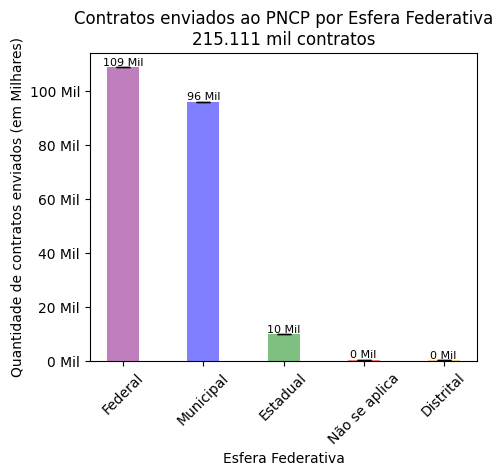

In [54]:
#ANALISE - QTDE E REPRESENTATIVIDADE DE ENVIO - GRÁFICO

#não apagar 
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import pandas as pd

# Configuração de cores personalizadas
cores_esferas = {
    "Distrital": "#bebada",
    "Estadual": "#80b1d3" , 
    "Federal": "#8dd3c7",    
    "Municipal": "#fb8072",    
    "Não se aplica": "#fdb462"
}

# Suponha que você tenha um DataFrame chamado 'df_distribuicao' com as colunas 'Esfera Federativa' e 'Nº contratos enviados'

# Configuração das barras de erro (opcional)
erros = [0.2] * len(df_distribuicao['Esfera Federativa'])

# Configuração de cores personalizadas
cores = ['purple', 'blue', 'green', 'red', 'orange']

# Largura personalizada das barras
largura_barras = 0.4

# Criando o gráfico de barras
plt.figure(figsize=(5, 4))
bars = plt.bar(df_distribuicao['Esfera Federativa'], df_distribuicao["Qtde contratos enviados"], alpha=0.5, color=cores, width=largura_barras, yerr=erros, capsize=5)


# Definindo rótulos dos eixos e título
plt.xlabel('Esfera Federativa')
plt.title(f'Contratos enviados ao PNCP por Esfera Federativa\n{quantidade_de_ocorr_em_contratos/1000} mil contratos')

# Personalizando rótulos do eixo x
plt.xticks(df_distribuicao['Esfera Federativa'], rotation=45)

# Formatando os rótulos do eixo y em milhares
def milhares_formatter(x, pos):
    return f'{x / 1000:.0f} Mil'

# Aplicando o formatador ao eixo y
formatter = FuncFormatter(milhares_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Definindo rótulo do eixo y
plt.ylabel('Quantidade de contratos enviados (em Milhares)')

# Formatando as etiquetas das barras para milhares
def milhares_bar_formatter(label, pos):
    return f'{label / 1000:.0f} Mil'

#Inserindo os rótulos
for bar, label in zip(bars, df_distribuicao['Qtde contratos enviados']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, milhares_bar_formatter(label, None), ha='center', va='bottom', fontsize=8)

# Exibindo o gráfico
plt.show()

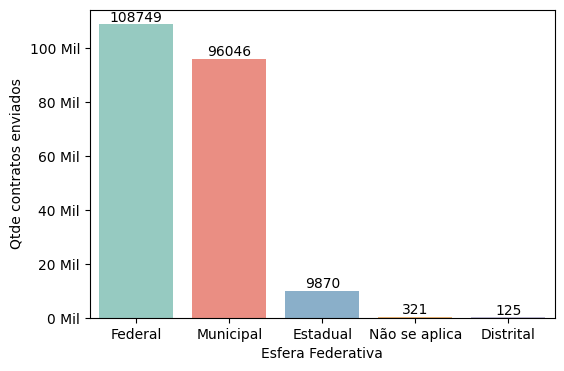

In [27]:
#ANALISE - QTDE E REPRESENTATIVIDADE DE ENVIO - GRÁFICO AJUDA COM CORES FÁBIO 

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import pandas as pd


# Criando o gráfico de barras
plt.figure(figsize=(6, 4))

ax = sns.barplot(df_distribuicao,
            x = 'Esfera Federativa',
            y = 'Qtde contratos enviados',
            hue = 'Esfera Federativa',
            palette = cores_esferas)


for i in range(len(ax.containers)):    
    ax.bar_label(ax.containers[i], fontsize=10);

# Formatando os rótulos do eixo y em milhares
def milhares_formatter(x, pos):
    return f'{x / 1000:.0f} Mil'

formatter = FuncFormatter(milhares_formatter)
ax.yaxis.set_major_formatter(formatter)

In [55]:
# Preparação para contagem de responsáveis por envio - para esfera Federal, contagem de Código de Unidades (UG); para esfera mun, estd e dist, contagem de CNPJ
df_contagem_UG_interm1=pd.DataFrame(df_calc_totais_com_pop.groupby(['anoContrato','orgaoEntidade_esferaId'])['unidadeOrgao_codigoUnidade'].nunique()).reset_index()
df_contagem_UG_interm1=df_contagem_UG_interm1.set_index('orgaoEntidade_esferaId')
df_contagem_UG_interm1=df_contagem_UG_interm1.loc['F'].reset_index()
df_contagem_UG_interm1.columns=('Esfera Federativa','Ano','Qtde de órgãos aderentes')
#df_contagem_UG_interm1.info()

df_contagem_CNPJ_interm1=pd.DataFrame(df_calc_totais_com_pop.groupby(['anoContrato','orgaoEntidade_esferaId'])['orgaoEntidade_cnpj'].nunique()).reset_index()
df_contagem_CNPJ_interm1=df_contagem_CNPJ_interm1.set_index('orgaoEntidade_esferaId')
df_contagem_CNPJ_interm1=df_contagem_CNPJ_interm1.drop('F').reset_index()
df_contagem_CNPJ_interm1.columns=('Esfera Federativa','Ano','Qtde de órgãos aderentes')


#Frame de contagem por aderentes em cada esfera, por ano
df_contagem_responsaveis=pd.concat([df_contagem_UG_interm1,df_contagem_CNPJ_interm1])
df_contagem_responsaveis=df_contagem_responsaveis[['Ano','Esfera Federativa', 'Qtde de órgãos aderentes']]
df_contagem_responsaveis.sort_values(by=['Ano','Esfera Federativa'],ascending=[True,True])



esfera_def={'F':'Federal', 'M':'Municipal', 'E':'Estadual', 'N':'Não se aplica','D':'Distrital'}

df_contagem_responsaveis['Esfera Federativa']=df_contagem_responsaveis['Esfera Federativa'].map(esfera_def)

df_contagem_responsaveis


,Ano,Esfera Federativa,Qtde de órgãos aderentes
0,2021,Federal,703
1,2022,Federal,1586
2,2023,Federal,2160
3,2024,Federal,1
4,2302,Federal,1
5,4761,Federal,1
0,2021,Distrital,1
1,2021,Estadual,15
2,2021,Municipal,10
3,2022,Distrital,1


In [56]:
#atribuição da contagem por agrupamento por ano, esfera e num de entidades aderentes

agg_panorama_ano=pd.DataFrame(df_calc_totais.groupby(['anoContrato','orgaoEntidade_esferaId'])['numeroControlePNCP'].count())
agg_panorama_ano=agg_panorama_ano.reset_index()


esfera_def={'F':'Federal', 'M':'Municipal', 'E':'Estadual', 'N':'Não se aplica','D':'Distrital'}



agg_panorama_ano.rename(columns={"anoContrato":"Ano","orgaoEntidade_esferaId":"Esfera Federativa","numeroControlePNCP":"Qtde contratos enviados"},inplace=True)

agg_panorama_ano['Esfera Federativa']=agg_panorama_ano['Esfera Federativa'].map(esfera_def)



In [57]:
#juntando as tabelas e calculando a proporção entre contratos enviados e órgãos aderentes

join_agg_pan_ano_df_cont=pd.merge(agg_panorama_ano, df_contagem_responsaveis ,left_on=('Ano','Esfera Federativa'), right_on=('Ano','Esfera Federativa'),how='left')
join_agg_pan_ano_df_cont['Razão de envios']=(join_agg_pan_ano_df_cont['Qtde contratos enviados']/join_agg_pan_ano_df_cont['Qtde de órgãos aderentes'])
#join_agg_pan_ano_df_cont  

In [31]:
#apagar só depois que configurar cores

#plt.style.use('fast')
#
## Agrupe os dados por 'Esfera Federativa' e 'Ano' e some as quantidades de contratos
#dados_agrupados = join_agg_pan_ano_df_cont.groupby(['Ano','Esfera Federativa'])['Qtde contratos enviados'].sum().unstack()
#
## Crie o gráfico de barras empilhadas
#ax = dados_agrupados.plot(kind='bar', stacked=True, figsize=(10, 6))
#
## Personalize o gráfico
#plt.xlabel('Esfera Federativa')
#plt.ylabel('Quantidade de Contratos Enviados')
#plt.title('Quantidade de Contratos Enviados por Esfera Federativa e Ano')
#
## Exiba o gráfico
#plt.legend(title='Ano', loc='upper right', labels=dados_agrupados.columns)
#plt.show()

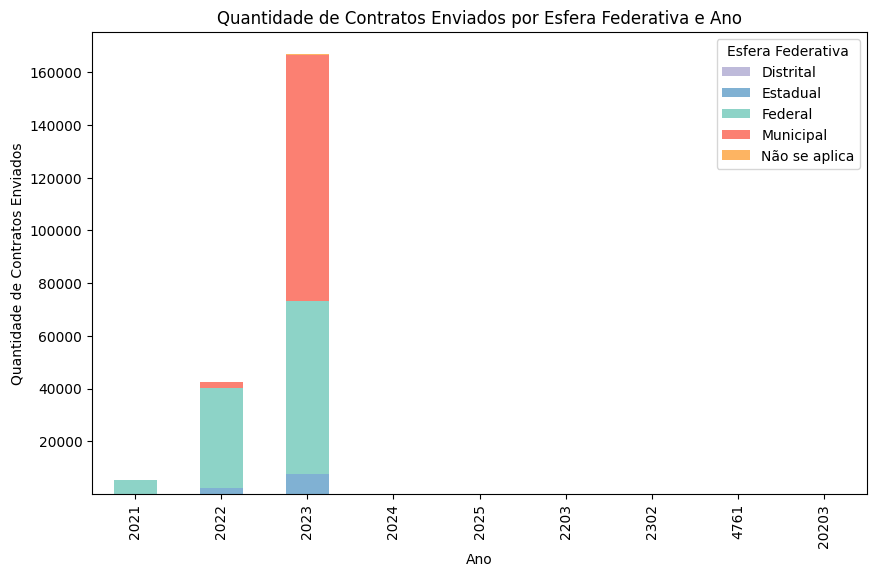

In [58]:
#tenativa de configurar as cores das barras

import matplotlib.pyplot as plt
import pandas as pd

dados_agrupados = (join_agg_pan_ano_df_cont
                   .groupby(['Ano','Esfera Federativa'])['Qtde contratos enviados']
                   .sum()
                   .unstack()
                  )

ax = dados_agrupados.plot(kind='bar', stacked=True, figsize=(10, 6), color = cores_esferas.values())

ax.set_xlabel('Ano')
ax.set_ylabel('Quantidade de Contratos Enviados')
ax.set_title('Quantidade de Contratos Enviados por Esfera Federativa e Ano')
ax.legend(title='Esfera Federativa', loc='upper right', labels=dados_agrupados.columns);

In [91]:
#ANALISE - PUBLICAÇÕES NO PORTAL POR DATA EVOLUÇÃO DE USO

# reconhecendo a coluna de data de publicação como formato de data
#df_calc_totais_com_pop['dataPublicacaoPncp']=pd.to_datetime(df_calc_totais_com_pop['dataPublicacaoPncp'])
#df_envios_por_mes=pd.DataFrame(df_calc_totais_com_pop.groupby(df_calc_totais_com_pop['dataPublicacaoPncp']).agg({'numeroControlePNCP':'count'})['dataPublicacaoPncp'])
#df_envios_por_mes=df_envios_por_mes.reset_index()
##df_envios_por_mes.info()
#df_envios_por_mes.columns=('Ano/mês do envio','Qtde de contratos enviados')
#df_envios_por_mes

#df_calc_totais_com_pop
#[dataPublicacaoPncp]

#df_calc_totais_com_pop['dataPublicacaoPncp']=[df_calc_totais_com_pop['dataPublicacaoPncp']]

##df_envios_por_mes=pd.DataFrame(df_calc_totais_com_pop.groupby(df_calc_totais_com_pop['dataPublicacaoPncp'].dt.to_period('M')).agg({'numeroControlePNCP':'count'})['dataPublicacaoPncp'])

#coversão da coluna de data de publicação para formato aaaa-mm
df_calc_totais_com_pop['dataPublicacaoPncp']=pd.to_datetime(df_calc_totais_com_pop['dataPublicacaoPncp'])
df_calc_totais_com_pop['dataPublicacaoPncp']=df_calc_totais_com_pop['dataPublicacaoPncp'].dt.strftime('%Y-%m')
df_envios_por_mes=pd.DataFrame(df_calc_totais_com_pop.groupby(df_calc_totais_com_pop['dataPublicacaoPncp']).agg({'numeroControlePNCP':'count'},{'dataPublicacaoPncp':'M'}))
df_envios_por_mes=df_envios_por_mes.reset_index()

df_envios_por_mes.columns=('Ano-mês do envio','Qtde de contratos enviados')
df_envios_por_mes

,Ano-mês do envio,Qtde de contratos enviados
0,2021-09,281
1,2021-10,1071
2,2021-11,1440
3,2021-12,2225
4,2022-01,203
5,2022-02,536
6,2022-03,1072
7,2022-04,1881
8,2022-05,2393
9,2022-06,3539


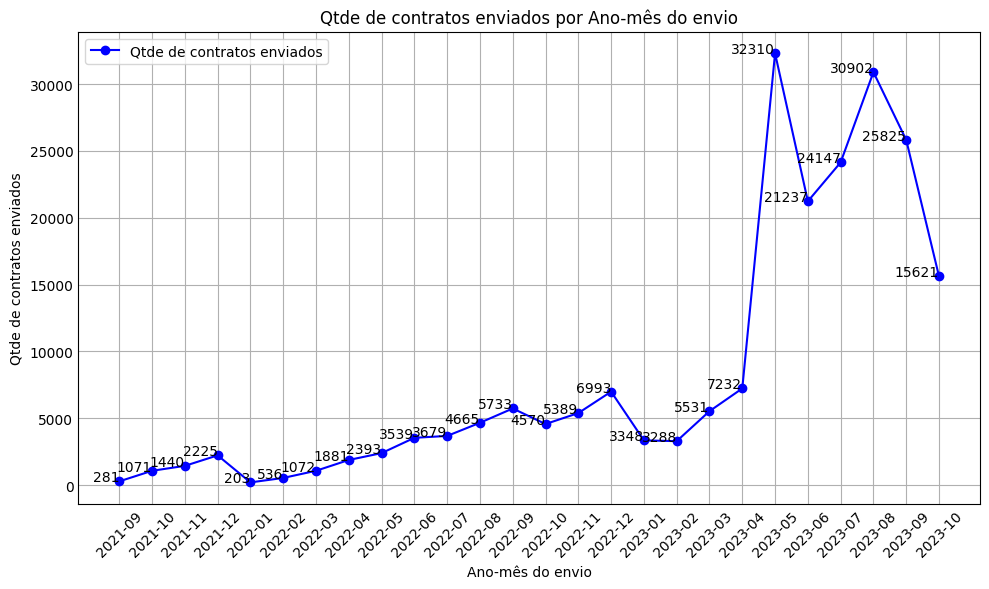

In [108]:
#ANALISE - Valores históricos do número de contratos por mês 

plt.figure(figsize=(10, 6))
plt.plot(df_envios_por_mes["Ano-mês do envio"], df_envios_por_mes["Qtde de contratos enviados"], marker='o', color='b', label='Qtde de contratos enviados')
plt.xlabel('Ano-mês do envio')
plt.ylabel('Qtde de contratos enviados')
plt.title('Qtde de contratos enviados por Ano-mês do envio')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.grid(True)
plt.legend()
# rótulos nos pontos
for i, txt in enumerate(df_envios_por_mes["Qtde de contratos enviados"]):
    plt.text(df_envios_por_mes["Ano-mês do envio"][i], df_envios_por_mes["Qtde de contratos enviados"][i], str(txt), ha='right')

plt.tight_layout()





# Mostrando o gráfico
plt.show()

**Tratamento de municípios x informações iniciais**

In [109]:
df_apenas_municipios= df_calc_totais_com_pop[df_calc_totais_com_pop['orgaoEntidade_esferaId']=='M'] 

df_apenas_municipios.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96046 entries, 26368 to 215110
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   dataPublicacaoPncp          96046 non-null  object 
 1   anoContrato                 96046 non-null  int64  
 2   niFornecedor                96046 non-null  object 
 3   tipoPessoa                  96046 non-null  object 
 4   nomeRazaoSocialFornecedor   96046 non-null  object 
 5   numeroControlePNCP          96046 non-null  object 
 6   objetoContrato              96046 non-null  object 
 7   valorGlobal                 96046 non-null  float64
 8   categoriaProcesso_id        96046 non-null  int64  
 9   categoriaProcesso_nome      96046 non-null  object 
 10  orgaoEntidade_cnpj          96046 non-null  int64  
 11  orgaoEntidade_razaoSocial   96046 non-null  object 
 12  orgaoEntidade_poderId       96046 non-null  object 
 13  orgaoEntidade_esferaId      960

In [110]:
#identifica o número de ocorrências de envios por municípios ao PNCP e o percentual
percentual_muni=(len(df_apenas_municipios['numeroControlePNCP'])/quantidade_de_ocorr_em_contratos)
percentual_muni

0.4464950653383602

In [ ]:
#cria dataframe apenas com a esfera requerida
#def esfera_ente(cod_esfera):
#    df_calc_totais=pd.read_csv('./dadosPNCP_completo_tratado.csv')
#   df_apenas_esfera_requerida=df_calc_totais[df_calc_totais['orgaoEntidade_esferaId']=='cod_esfera']
#   return df_apenas_esfera_requerida

In [111]:
#quantidade de municípios que realizaram envios desde o início do PNCP
df_apenas_municipios['unidadeOrgao_codigoIbge'].nunique()


1070

In [129]:
pip install streamlit 

  Obtaining dependency information for streamlit from https://files.pythonhosted.org/packages/e3/b0/b671eb919e6ff369d9bc75471a3a7ba1e82430edbbed8ef5ce9b3e2a4972/streamlit-1.28.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for altair<6,>=4.0 from https://files.pythonhosted.org/packages/17/16/b12fca347ff9d062e3c44ad9641d2ec50364570a059f3078ada3a5119d7a/altair-5.1.2-py3-none-any.whl.metadata
  Obtaining dependency information for blinker<2,>=1.0.0 from https://files.pythonhosted.org/packages/bf/2b/11bcedb7dee4923253a4a21bae3be854bcc4f06295bd827756352016d97c/blinker-1.6.3-py3-none-any.whl.metadata
  Obtaining dependency information for cachetools<6,>=4.0 from https://files.pythonhosted.org/packages/a2/91/2d843adb9fbd911e0da45fbf6f18ca89d07a087c3daa23e955584f90ebf4/cachetools-5.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for protobuf<5,>=3.20 from https://files.pythonhosted.org/packages/c2/59/f89c04923d68595d359f4cd7adbbdf5e5d791257945f8873d88b2fd1f

In [112]:
#quantidades de municípios diferentes que fizeram algum envio ao PNCP, agrupados por ano
agg_df_apenas_municipios = df_apenas_municipios.groupby('anoContrato').agg({'unidadeOrgao_codigoIbge':'nunique'}).reset_index()
agg_df_apenas_municipios.columns=['Ano','Qtde municípios diferentes']
agg_df_apenas_municipios

,Ano,Qtde municípios diferentes
0,2021,9
1,2022,156
2,2023,1044
3,2024,1
4,2025,1
5,2203,1
6,20203,1


In [113]:
#outra forma
#quantidades de municípios diferentes que fizeram algum envio ao PNCP, agrupados por ano
df_ano_mun=df_apenas_municipios.groupby(['anoContrato'])['unidadeOrgao_codigoIbge'].nunique().reset_index()
df_ano_mun.columns=['Ano','Qtde_mun']
df_ano_mun


,Ano,Qtde_mun
0,2021,9
1,2022,156
2,2023,1044
3,2024,1
4,2025,1
5,2203,1
6,20203,1


In [ ]:
#valores globais dos contratos enviados por municípios ordenados 
df_apenas_municipios.groupby(['unidadeOrgao_codigoIbge','unidadeOrgao_municipioNome'])['valorGlobal'].sum().sort_values(ascending=False).head(10)

In [ ]:
#ANALISE
#quantidade de envios realizada por cada município ordenada
df_10_mun_mais_freq=pd.DataFrame(df_apenas_municipios.groupby(['unidadeOrgao_codigoIbge','unidadeOrgao_municipioNome','unidadeOrgao_ufSigla'])['numeroControlePNCP'].count().sort_values(ascending=False).head(10))
df_10_mun_mais_freq=df_10_mun_mais_freq.reset_index()
df_10_mun_mais_freq

df_10_mun_mais_freq.columns=['Cod. IBGE','Município','UF','Qtde de contratos enviados']
df_10_mun_mais_freq

In [114]:
#ANALISE
#quantidade de envios realizada por UF do município
agg_df_UF_mais_frequentes_municipios = df_apenas_municipios.groupby('unidadeOrgao_ufSigla').agg({'unidadeOrgao_codigoIbge':'nunique'}).reset_index()

agg_df_UF_mais_frequentes_municipios.columns=['UF','Qtde municípios diferentes']

agg_df_UF_mais_frequentes_municipios=agg_df_UF_mais_frequentes_municipios.sort_values(by='Qtde municípios diferentes',ascending=False)

agg_df_UF_mais_frequentes_municipios




,UF,Qtde municípios diferentes
18,SC,262
17,RS,144
4,GO,122
6,MG,101
20,SP,78
13,PR,78
1,BA,69
10,PB,41
2,CE,40
15,RN,23


In [115]:
#UFs que não têm nenhum município que realizaram envios

#obs

join_df_popul_agg_df_UF_mais_frequentes_municipios=pd.merge(df_popul,agg_df_UF_mais_frequentes_municipios,left_on='UF', right_on='UF',how='left',indicator=True)
UF_sem_envios_mun=join_df_popul_agg_df_UF_mais_frequentes_municipios[join_df_popul_agg_df_UF_mais_frequentes_municipios['_merge']=='left_only']
UF_sem_envios_mun.groupby('UF')['UF'].nunique()

UF
AC    1
AM    1
AP    1
DF    1
RR    1
Name: UF, dtype: int64

In [ ]:
#Caderno da Gabi

#df.drop_duplicates().groupby(['usuarioNome'])['numeroControlePNCP'].value_counts().sort_values(ascending=True)
#df = df.drop_duplicates()

**listagem de municípios obrigados que não realizaram envios ao PNCP**

In [116]:
# join entre a tabela de população do ibge e tabela de envios de municípios
join_df_pop_df_apenas_municipios=pd.merge(df_popul,df_apenas_municipios['unidadeOrgao_codigoIbge'],left_on='cod_mun_corr', right_on='unidadeOrgao_codigoIbge',how='left').drop_duplicates()
join_df_pop_df_apenas_municipios
#obrigados_sem_envios.to_excel('obrigados_sem_envios.xlsx')

,UF,NOME DO MUNICÍPIO,populacao,cod_mun_corr,ente_obrigado,unidadeOrgao_codigoIbge
0,RO,Alta Floresta D'Oeste,21494,1100015,True,NaN
1,RO,Ariquemes,96833,1100023,True,1100023
23,RO,Cabixi,5351,1100031,False,NaN
24,RO,Cacoal,86887,1100049,True,1100049
25,RO,Cerejeiras,15890,1100056,False,NaN
...,...,...,...,...,...,...
100416,GO,Vianópolis,14956,5222005,False,5222005
100512,GO,Vicentinópolis,8768,5222054,False,5222054
100537,GO,Vila Boa,4215,5222203,False,NaN
100538,GO,Vila Propício,5815,5222302,False,5222302


In [117]:
#cria df somente com municípios obrigados que não realizaram envios ao PNCP 
mun_sem_envios=join_df_pop_df_apenas_municipios[join_df_pop_df_apenas_municipios['unidadeOrgao_codigoIbge'].isna()]
mun_sem_envios.shape
#conta quantos obrigados não realizaram envios
#mun_sem_envios['cod_mun_corr_x'].count()

#mun_sem_envios.to_excel('mun_sem_envios.xlsx')

(4500, 6)

In [118]:
#quantidade de não obrigados que não enviaram ##CORRIGIR
mun_sem_envios[mun_sem_envios['ente_obrigado']==False].count()

#nao_obrigados
#nao_obrigados['numeroControlePNCP'].isna().count()

UF                         3271
NOME DO MUNICÍPIO          3271
populacao                  3271
cod_mun_corr               3271
ente_obrigado              3271
unidadeOrgao_codigoIbge       0
dtype: int64

In [119]:
#configurando lista com codigos de capitais
cod_ibge_capitais=['2800308','1501402','3106200','1400100','5300108', '5002704','5103403','4106902','4205407','2304400','5208707','2507507','1600303','2704302','1302603','2408102','1721000','4314902','1100205','2611606','1200401','3304557','2927408','2111300','3550308','2211001','3205309']

In [120]:
#retorno de comparação entre capitais e coluna de códigos ibge de municípios sem envio
capitais_sem_envio=mun_sem_envios[mun_sem_envios['cod_mun_corr'].isin(cod_ibge_capitais)]
capitais_sem_envio

,UF,NOME DO MUNICÍPIO,populacao,cod_mun_corr,ente_obrigado,unidadeOrgao_codigoIbge
54,RO,Porto Velho,460434,1100205,True,NaN
135,AC,Rio Branco,364756,1200401,True,NaN
180,AM,Manaus,2063689,1302603,True,NaN
207,RR,Boa Vista,413486,1400100,True,NaN
240,PA,Belém,1303403,1501402,True,NaN
441,AP,Macapá,442933,1600303,True,NaN
597,TO,Palmas,302692,1721000,True,NaN
837,MA,São Luís,1037775,2111300,True,NaN
1092,PI,Teresina,866300,2211001,True,NaN
1242,CE,Fortaleza,2428708,2304400,True,NaN


**Tratamento de estados (inclui governo distrital) x informações iniciais**

In [121]:
#cria df só com ocorrências de envios estaduais
df_apenas_estados= df_calc_totais_com_pop[(df_calc_totais_com_pop['orgaoEntidade_esferaId']=='E')|(df_calc_totais_com_pop['orgaoEntidade_esferaId']=='D')]
df_apenas_estados                  


,dataPublicacaoPncp,anoContrato,niFornecedor,tipoPessoa,nomeRazaoSocialFornecedor,numeroControlePNCP,objetoContrato,valorGlobal,categoriaProcesso_id,categoriaProcesso_nome,...,orgaoEntidade_esferaId,unidadeOrgao_ufSigla,unidadeOrgao_codigoUnidade,unidadeOrgao_nomeUnidade,unidadeOrgao_codigoIbge,unidadeOrgao_municipioNome,UF,populacao,cod_mun_corr,ente_obrigado
232,2022-03,2021,03144992000119,PJ,VIGITEC SEGURANCA LTDA,89550032000174-2-000001/2021,"Prestação de serviços terceirizados, de nature...",523458.62,8,Serviços,...,E,RS,200,TRIBUNAL DE CONTAS DO ESTADO DO RS,4314902,Porto Alegre,RS,1332833,4314902,True
277,2022-03,2022,92802784000190,PJ,COMPANHIA RIOGRANDENSE DE SANEAMENTO CORSAN,89550032000174-2-000005/2022,Contratação de abastecimento de água e coleta ...,4320.00,2,Compras,...,E,RS,200,TRIBUNAL DE CONTAS DO ESTADO DO RS,4314902,Porto Alegre,RS,1332833,4314902,True
1099,2022-11,2022,05449614000179,PJ,INTEGRAR/RS-ASSOCIACAO DE INTEGRACAO EMPRESA E...,24846794000177-2-000001/2022,Agente de Integração para intermediar prestaçã...,8236.80,8,Serviços,...,E,RS,1,FUNDAÇÃO DE PREVIDÊNCIA COMPLEMENTAR DO SERVID...,4314902,Porto Alegre,RS,1332833,4314902,True
1221,2022-03,2022,02016440000162,PJ,RGE SUL DISTRIBUIDORA DE ENERGIA S.A.,89550032000174-2-000001/2022,Fornecimento de energia elétrica para os Servi...,100200.00,2,Compras,...,E,RS,200,TRIBUNAL DE CONTAS DO ESTADO DO RS,4314902,Porto Alegre,RS,1332833,4314902,True
1314,2022-03,2022,92924901000198,PJ,PORTO ALEGRE DEPARTAMENTO MUNICIPAL DE AGUAS E...,89550032000174-2-000002/2022,Fornecimento de água e de tratamento de esgoto...,365280.00,8,Serviços,...,E,RS,200,TRIBUNAL DE CONTAS DO ESTADO DO RS,4314902,Porto Alegre,RS,1332833,4314902,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215097,2023-09,2023,32526468000100,PJ,T TAVARES FELINTO E CIA. LTDA,07954480000179-2-000631/2023,Gêneros de Alimentação - EEMTI ARISTARCO CARDO...,50241.00,2,Compras,...,E,CE,228644,EEM ARISTARCO CARDOSO,2311108,Porteiras,CE,17050,2311108,False
215098,2023-09,2023,32526468000100,PJ,T TAVARES FELINTO E CIA. LTDA,07954480000179-2-000632/2023,Gêneros de Alimentação - EEMTI ARISTARCO CARDO...,53465.00,2,Compras,...,E,CE,228644,EEM ARISTARCO CARDOSO,2311108,Porteiras,CE,17050,2311108,False
215099,2023-09,2023,11278775000140,PJ,OLINDINA MARIA DE SOUSA NETA,07954480000179-2-000634/2023,Aquisição de Material de Consumo- Gêneros Alim...,34197.50,2,Compras,...,E,CE,228346,EEM HUET ARRUDA,2308807,Moraújo,CE,8254,2308807,False
215107,2023-10,2023,72074180000167,PJ,FRANCISCA SOUSA NETA - ME,07954480000179-2-000931/2023,AQUISIÇÃO DE GÊNEROS ALIMENTICIOS - ÁGUA MINER...,43624.50,2,Compras,...,E,CE,228536,EEM MARIA JOSÉ COUTINHO,2311264,Quiterianópolis,CE,20213,2311264,True


In [122]:
envios_estados=df_apenas_estados.groupby('unidadeOrgao_ufSigla')['numeroControlePNCP'].count()
#pd.DataFrame()
#lista_estados_com_envios=df_apenas_estados.groupby('unidadeOrgao_ufSigla')['unidadeOrgao_ufSigla'].count()
df_envios_estados=pd.DataFrame(envios_estados)
df_envios_estados.reset_index(inplace=True)
#df_envios_estados['UF']=df_envios_estados.index
df_envios_estados['Repres percentual']=((df_envios_estados['numeroControlePNCP']/df_envios_estados['numeroControlePNCP'].sum())*100)
df_envios_estados.columns=['UF','Qtde envios','Repres percentual']

df_envios_estados=df_envios_estados.sort_values(by='Repres percentual',ascending=False)
df_envios_estados


,UF,Qtde envios,Repres percentual
24,SP,2925,29.264632
16,PR,1044,10.445223
4,CE,1031,10.315158
9,MG,905,9.054527
17,RJ,497,4.972486
13,PB,459,4.592296
8,MA,328,3.281641
12,PA,322,3.221611
7,GO,296,2.961481
11,MT,231,2.311156


In [123]:
#identificação de uf que não realizaram envios
uf_sem_envios=df_envios_estados.merge(df_popul, left_on='UF',right_on='UF',how='outer',indicator=True)
uf_sem_envios=uf_sem_envios[uf_sem_envios['_merge']=='right_only']
uf_sem_envios['UF'].unique()

#uf_sem_envios=df_envios_estados.merge(df_popul, left_on='unidadeOrgao_ufSigla',right_on='UF',how='right')
#uf_sem_envios


array(['AC'], dtype=object)

**Tratamento de órgãos federais**

In [124]:
df_apenas_fed= df_calc_totais_com_pop[df_calc_totais_com_pop['orgaoEntidade_esferaId']=='F']
df_apenas_fed

,dataPublicacaoPncp,anoContrato,niFornecedor,tipoPessoa,nomeRazaoSocialFornecedor,numeroControlePNCP,objetoContrato,valorGlobal,categoriaProcesso_id,categoriaProcesso_nome,...,orgaoEntidade_esferaId,unidadeOrgao_ufSigla,unidadeOrgao_codigoUnidade,unidadeOrgao_nomeUnidade,unidadeOrgao_codigoIbge,unidadeOrgao_municipioNome,UF,populacao,cod_mun_corr,ente_obrigado
0,2021-09,2021,36756134000184,PJ,EDINEIA DA SILVA EDUARDO - BANCA DO CARTUCHO E...,00394452054700-2-000001/2021,"AQS DE TONERS P/ IMPRESSORAS DO PMED DA OM, CO...",868.74,2,Compras,...,F,RS,167250,1 BATALHAO DE COMUNICACOES DIVISIONARIO,4314902,Porto Alegre,RS,1332833,4314902,True
1,2021-09,2021,09383469000121,PJ,PAULO BORSATTI & CIA LTDA,00394452054700-2-000006/2021,"AQS DE CESTO DE ELEVAÇÃO DE PESSOAS, CONF. PA...",13473.00,2,Compras,...,F,RS,167250,1 BATALHAO DE COMUNICACOES DIVISIONARIO,4314902,Porto Alegre,RS,1332833,4314902,True
2,2021-09,2021,30041676000194,PJ,VIVO LICITACOES EIRELI,00394452054700-2-000008/2021,"AQS DE MAT PERMANENTE PARA A CCN DA OM , CONF...",999.00,2,Compras,...,F,RS,167250,1 BATALHAO DE COMUNICACOES DIVISIONARIO,4314902,Porto Alegre,RS,1332833,4314902,True
3,2021-09,2021,37916348000133,PJ,JONI ROBERTO ZIN,00394452054700-2-000009/2021,"AQS DE MAT PERMANENTE PARA A CCN DA OM , CONF...",1989.74,2,Compras,...,F,RS,167250,1 BATALHAO DE COMUNICACOES DIVISIONARIO,4314902,Porto Alegre,RS,1332833,4314902,True
4,2021-09,2021,37916348000133,PJ,JONI ROBERTO ZIN,00394452054700-2-000029/2021,"AQUISIÇÃO DE MATERIAL PARA A CCPC DA OM, CONF...",760.00,2,Compras,...,F,RS,167250,1 BATALHAO DE COMUNICACOES DIVISIONARIO,4314902,Porto Alegre,RS,1332833,4314902,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214439,2023-08,2023,43061074000140,PJ,LD ALMEIDA COMERCIO E SERVICOS LTDA,10648539000105-2-000117/2023,DESPESA QUE SE EMPENHA REFERENTE A APAR.EQUIP....,1921.82,8,Serviços,...,F,MG,158303,INST.SUL DE MG/CAMPUS MUZAMBINHO,3144102,Muzambinho,MG,21891,3144102,True
214480,2023-08,2023,87883807000106,PJ,MBM SEGURADORA SA,10882594000165-2-000251/2023,SRP 18/2023 - AQUISIÇÃO DE SERVIÇO - PLANO COL...,2340.00,8,Serviços,...,F,SP,158344,"INST.FED.DE ED.,CIENC.E TEC.DE SÃO PAULO",3507605,Bragança Paulista,SP,176811,3507605,True
214481,2023-10,2023,54835574000109,PJ,EXTINTORES BRASIL LTDA,10882594000165-2-000292/2023,SRP 41/2023 - AQUISIÇÃO DE MATERIAL DE CONSUMO...,3393.00,8,Serviços,...,F,SP,158344,"INST.FED.DE ED.,CIENC.E TEC.DE SÃO PAULO",3507605,Bragança Paulista,SP,176811,3507605,True
214868,2023-09,2023,03997641000150,PJ,"COOPERATIVA DE TRABALHO AGRICOLA, ASSISTENCIA ...",10767239000145-2-000062/2023,AQUISIÇÃO DE ALIMENTOS PARA DOAÇÃO ATRAVÉS DO ...,105202.67,2,Compras,...,F,PE,155341,IF DE PERNAMBUCO ABREU E LIMA,2600054,Abreu E Lima,PE,98462,2600054,True


In [125]:
#cria df para apresentacao de percentuais de representatividade de envio
poder_fed=df_apenas_fed.groupby(['orgaoEntidade_poderId'])['numeroControlePNCP'].count()
poder_fed_valores=df_apenas_fed.groupby(['orgaoEntidade_poderId'])['valorGlobal'].sum()
#cria frame com distribuição de freuqencia de envios federais por poder
df_poder_fed_dist=pd.DataFrame(poder_fed)
df_poder_fed_dist['Repres percentual']=((poder_fed/len(df_apenas_fed))*100)
df_poder_fed_dist.reset_index(inplace=True)
df_poder_fed_dist.rename(columns={"orgaoEntidade_poderId":"Poder","numeroControlePNCP":"Qtde envios"},inplace=True)
df_poder_fed_dist 

,Poder,Qtde envios,Repres percentual
0,E,103036,94.746618
1,J,5548,5.101656
2,L,117,0.107587
3,N,48,0.044138


In [ ]:
#poder_fed_valores=df_apenas_fed.groupby(['orgaoEntidade_poderId'])['valorGlobal'].sum()
#poder_fed_valores

In [126]:
#cria df para envios do executivo federal
df_poder_fed_exec=df_apenas_fed[df_apenas_fed['orgaoEntidade_poderId']=='E']
df_poder_fed_exec

#agrupamento por UG
poder_fed_exec_dist=df_poder_fed_exec.groupby(['unidadeOrgao_codigoUnidade','unidadeOrgao_nomeUnidade'])['numeroControlePNCP'].count()
df_poder_fed_exec_dist=pd.DataFrame(poder_fed_exec_dist)

df_poder_fed_exec_dist.reset_index(inplace=True)






df_poder_fed_exec_dist.sort_values(by='numeroControlePNCP', ascending=False,inplace=True)


#df_poder_fed_exec_dist

df_poder_fed_exec_dist.rename(columns={"unidadeOrgao_codigoUnidade":"Unidade_Cod","unidadeOrgao_codigoUnidade":"Unidade_Nome","numeroControlePNCP":"Qtde_envios"},inplace=True)
df_poder_fed_exec_dist.head(20)
#
#df_poder_fed_exec_dist
#poder_fed_exec_dist=poder_fed_exec_dist.sort_values(by='proporcao', ascending=False)
#df_poder_fed_exec_dist=pd.DataFrame(poder_fed_exec_dist)
#df_poder_fed_exec_dist[]
#df_poder_fed_exec_dist.sort_values(by='proporcao', ascending=False)

#df_distribuicao=pd.DataFrame(distribuicao)
#df_distribuicao['proporcao']=((df_distribuicao/quantidade_de_ocorr_em_contratos)*100)
##df_distribuicao.rename(columns={"orgaoEntidade_esferaId":"Qtde_envios","orgaoEntidade_esferaId:},inplace=True)
#
#
#df_distribuicao.sort_values(by='proporcao', ascending=False)
##df_distribuicao
#df_distribuicao.reset_index(inplace=True)
#df_distribuicao.rename(columns={"orgaoEntidade_esferaId":"esfera","numeroControlePNCP":"qtde_envios"},inplace=True)
#
#
##esfera_def={'F':'Federal', 'M':'Municipal', 'E':'Estadual', 'N':'Não se aplica','D':'Distrital'}
##df_distribuicao['esfera']=map(esfera_def)
#df_distribuicao


,Unidade_Nome,unidadeOrgao_nomeUnidade,Qtde_envios
1132,160500,ESC REG OPERACIONAL CARRO-PIPA/1 GR,2575
2209,791181,CENT.INTEND.DA MARINHA EM S.PEDRO DA ALDEIA,2247
906,160183,72 BATALHAO DE INFANTARIA MOTORIZADO,2126
1154,160552,ESC REGIONAL DA OPERAÇÃO CARRO-PIPA/ 7 RM,1594
2119,751200,GRUPAMENTO DE NAVIOS HIDROCEANOGRAFICOS,1386
1100,160454,MEX-28. BATALHAO DE CACADORES/SE,1349
2207,791010,CENTRO DE INTENDENCIA DA MARINHA NITEROI,1322
901,160176,COMANDO 1.GRUPAMENTO DE ENGENHARIA,1031
222,153120,MEC-CENTRO CIENC.MAT.E DA NATUREZA DA UF/RJ,956
1129,160496,ESCRITóRIO REGIONAL OPERAçãO PIPA/ 6 RM,952


In [127]:
#agrupamento por valor global
poder_fed_exec_dist_valor=df_poder_fed_exec.groupby(['unidadeOrgao_codigoUnidade','unidadeOrgao_nomeUnidade'])['valorGlobal'].sum()
df_poder_fed_exec_dist_valor=pd.DataFrame(poder_fed_exec_dist_valor)
df_poder_fed_exec_dist_valor.reset_index()
df_poder_fed_exec_dist_valor.sort_values(by='valorGlobal', ascending=False,inplace=True)
df_poder_fed_exec_dist_valor_top=df_poder_fed_exec_dist_valor.head(20)

df_poder_fed_exec_dist_valor_top.reset_index()


#df_poder_fed_exec_dist_valor = df_top10.groupbyy(['unidadeOrgao_codigoUnidade','unidadeOrgao_nomeUnidade']).agg({'unidadeOrgao_codigoUnidade': 'unique', 'unidadeOrgao_nomeUnidade': 'nunique', 'valorGlobal': 'sum','numeroControlePNCP':'count' }).sort_values(by= ['valorGlobal'], ascending= False).reset_index()

,unidadeOrgao_codigoUnidade,unidadeOrgao_nomeUnidade,valorGlobal
0,254420,FUNDACAO OSWALDO CRUZ/RJ,1.361275e+09
1,240009,DEPARTAMENTO DO SERVICO EXTERIOR - MRE,1.308590e+09
2,160069,COMANDO LOGISTICO,1.112221e+09
3,250005,DEPARTAMENTO DE LOGÍSTICA EM SAUDE,7.739244e+08
4,254445,INSTITUTO DE TECNOLOGIA EM IMUNOBIOLOGICOS,5.638580e+08
5,158265,INST.FED.DO RS/CAMPUS CANOAS,2.992469e+08
6,254452,FUNDAÇÃO OSWALDO CRUZ,2.564501e+08
7,254462,DIRETORIA DE ADMINISTRAçãO DO CAMPUS-FIOCRUZ,2.414218e+08
8,153037,UNIVERSIDADE FEDERAL DE ALAGOAS,2.046357e+08
9,153061,MEC/UNIVERSIDADE FEDERAL DE JUIZ DE FORA,1.751990e+08


In [128]:
df_poder_fed_exec_dist_valor.reset_index()

,unidadeOrgao_codigoUnidade,unidadeOrgao_nomeUnidade,valorGlobal
0,254420,FUNDACAO OSWALDO CRUZ/RJ,1.361275e+09
1,240009,DEPARTAMENTO DO SERVICO EXTERIOR - MRE,1.308590e+09
2,160069,COMANDO LOGISTICO,1.112221e+09
3,250005,DEPARTAMENTO DE LOGÍSTICA EM SAUDE,7.739244e+08
4,254445,INSTITUTO DE TECNOLOGIA EM IMUNOBIOLOGICOS,5.638580e+08
...,...,...,...
2296,160241,ODONTOCLINICA CENTRAL DO EXERCITO,6.028000e+02
2297,152420,INSTITUTO FEDERAL DE SERGIPE/CAMPUS GLORIA,2.950000e+02
2298,716000,PROCURADORIA ESPECIAL DA MARINHA,1.734000e+02
2299,925136,BANCO CENTRAL DO BRASIL - RIO DE JANEIRO,1.250400e+02
